In [13]:
from utils.tools import *

In [14]:
path=r"C:\Users\cjang\Desktop\\"
path2 = r"C:\Users\cjang\Desktop\impedance_data\data\\"
data = ['DE_40_1_30.mpt']

In [15]:
re = mpt_data(path, data)
re2 = mpt_data(path2, data)


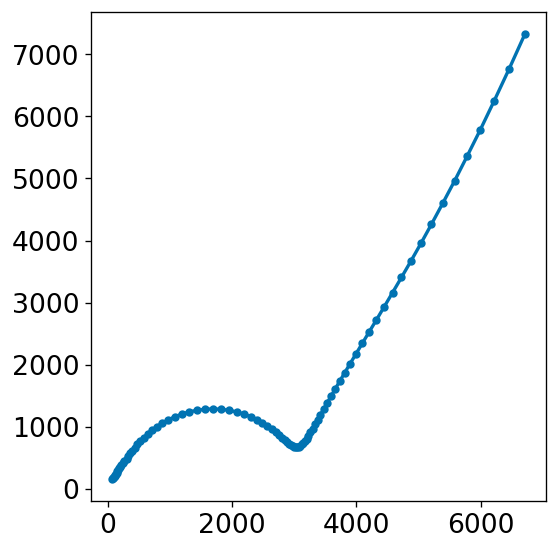

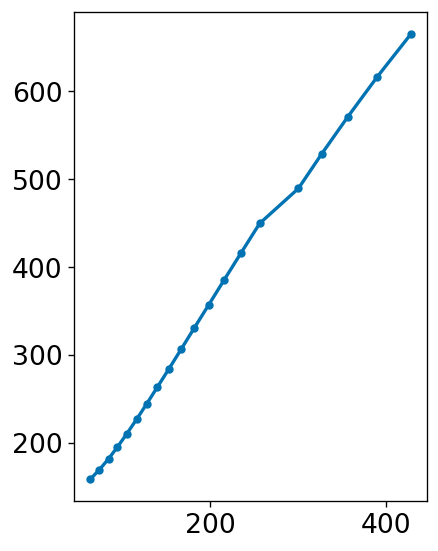

In [16]:
adj_re = importer(path, data, 10**6, 10**1.5)[0]

exam = importer(path2, data, 10**6, 10**1.5)[1]

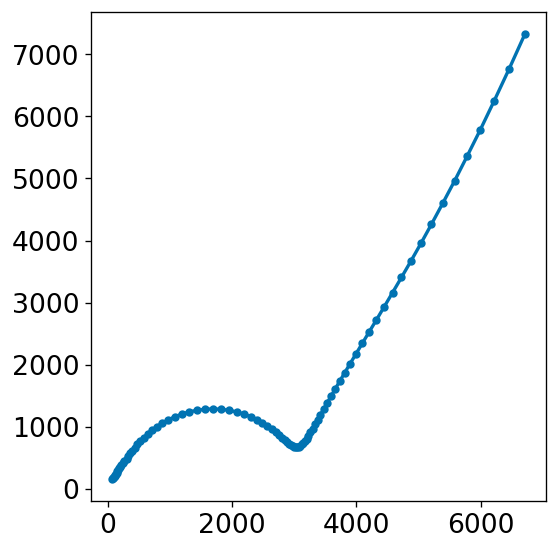

In [17]:
adj_re.mpt_plot()

In [21]:
#USES THE EIS FITTING FUNCTION TO PREDICT THE FREQUENCIES OF THE MPT FILE

#INITIAL ARBITRARY GUESSES
#WILL CREATE A MANUAL FUNCTION THAT CAN ADJUST THE INITIAL GUESSES BUT FOR RIGHT NOW, RUN WITH THESE
Rs_guess = 10

R_guess = 2959
n_guess = 0.8
fs_guess = 23023

R2_guess = 258738
n2_guess = 0.8
fs2_guess = 0.2



#USE THE PARAMETERS DATA STRUCTURE TO WRAP THE INITIAL VALUES
params = Parameters()
params.add('Rs', value=R_guess, min=Rs_guess*.01, max=Rs_guess*100)

params.add('R', value=R_guess, min=R_guess*.1, max=R_guess*10)
params.add('n', value=n_guess, min=.65, max=1.2)
params.add('fs', value=fs_guess, min=10**0.5, max=10**6)
#params.add('Q', value=fs_guess, min=10**0.5, max=10**6)

params.add('R2', value=R2_guess, min=R2_guess*.1, max=R2_guess*10)
params.add('n2', value=n2_guess, min=.65, max=1.2)
params.add('fs2', value=fs2_guess, min=10**-2, max=10**1)
#params.add('Q2', value=fs2_guess, min=10**-2, max=10**2)



#FIT THE PARAMETERS ALONG THE R - RQ - RQ CIRCUIT
#LATER WILL PROVIDE OPTIONS TO BENEFITS AND DETRACTIONS OF THE WEIGHT FUNCTION AFTER FURTHER RESEARCH
#print(mpt_data.df[0].keys())
guess = adj_re.mpt_fit(params=params, circuit='R-RQ-RQ', weight_func='modulus')
#THIS WILL OUTPUT A SET OF COEFFICIENTS PREDICTED FROM THE FIT

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 299
    # data points      = 180
    # variables        = 7
    chi-square         = 187.645703
    reduced chi-square = 1.08465724
    Akaike info crit   = 21.4877798
    Bayesian info crit = 43.8384778
[[Variables]]
    Rs:   39.3265692 +/- 3.18321413 (8.09%) (init = 1000)
    R:    2957.94044 +/- 15.1757501 (0.51%) (init = 2959)
    n:    0.84601808 +/- 0.00304709 (0.36%) (init = 0.8)
    fs:   23050.4496 +/- 204.233584 (0.89%) (init = 23023)
    R2:   292960.600 +/- 102841.962 (35.10%) (init = 258738)
    n2:   0.71084396 +/- 0.00524106 (0.74%) (init = 0.8)
    fs2:  0.21678808 +/- 0.11603917 (53.53%) (init = 0.2)
[[Correlations]] (unreported correlations are < 0.100)
    C(R2, fs2) = -1.000
    C(n2, fs2) =  0.925
    C(R2, n2)  = -0.914
    C(R, n2)   =  0.812
    C(R, fs)   = -0.795
    C(R, n)    = -0.748
    C(n, fs)   =  0.677
    C(R, fs2)  =  0.663
    C(R, R2)   = -0.649
    C(fs, n2)  = -0.629
  

In [22]:
adj_re.fit_Rs[0]


39.32656915622596

In [23]:
Rs_guess = adj_re.fit_Rs[0]

R_guess = adj_re.fit_R[0]

n_guess = adj_re.fit_n[0]

fs_guess = adj_re.fit_fs[0]


R2_guess = adj_re.fit_R2[0]

n2_guess = adj_re.fit_n2[0]

fs2_guess = adj_re.fit_fs2[0]




#USE THE PARAMETERS DATA STRUCTURE TO WRAP THE INITIAL VALUES
params1 = Parameters()
params1.add('Rs', value=R_guess, min=Rs_guess*.01, max=Rs_guess*100)

params1.add('R', value=R_guess, min=R_guess*.1, max=R_guess*10)
params1.add('n', value=n_guess, min=.65, max=1.2)
params1.add('fs', value=fs_guess, min=10**0.5, max=10**6)
#params1.add('Q', value=fs_guess, min=10**0.5, max=10**6)

params1.add('R2', value=R2_guess, min=R2_guess*.1, max=R2_guess*10)
params1.add('n2', value=n2_guess, min=.65, max=1.2)
params1.add('fs2', value=fs2_guess, min=10**-2, max=10**1)
#params1.add('Q2', value=fs2_guess, min=10**-2, max=10**2)



#FIT THE PARAMETERS ALONG THE R - RQ - RQ CIRCUIT
#LATER WILL PROVIDE OPTIONS TO BENEFITS AND DETRACTIONS OF THE WEIGHT FUNCTION AFTER FURTHER RESEARCH
#print(mpt_data.df[0].keys())
guess = adj_re.mpt_fit(params=params1, circuit='R-RQ-RQ', weight_func='modulus')
#THIS WILL OUTPUT A SET OF COEFFICIENTS PREDICTED FROM THE FIT

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 218
    # data points      = 180
    # variables        = 7
    chi-square         = 187.419108
    reduced chi-square = 1.08334744
    Akaike info crit   = 21.2702856
    Bayesian info crit = 43.6209836
[[Variables]]
    Rs:   40.5524952 +/- 3.22552652 (7.95%) (init = 2957.94)
    R:    2955.52717 +/- 15.2675688 (0.52%) (init = 2957.94)
    n:    0.84660074 +/- 0.00308440 (0.36%) (init = 0.8460181)
    fs:   23059.0659 +/- 205.191429 (0.89%) (init = 23050.45)
    R2:   297010.640 +/- 106135.058 (35.73%) (init = 292960.6)
    n2:   0.71055416 +/- 0.00526475 (0.74%) (init = 0.710844)
    fs2:  0.21214152 +/- 0.11558145 (54.48%) (init = 0.2167881)
[[Correlations]] (unreported correlations are < 0.100)
    C(R2, fs2) = -1.000
    C(n2, fs2) =  0.925
    C(R2, n2)  = -0.914
    C(R, n2)   =  0.813
    C(R, fs)   = -0.797
    C(R, n)    = -0.749
    C(n, fs)   =  0.681
    C(R, fs2)  =  0.664
    C(R, R2)   = -0.65

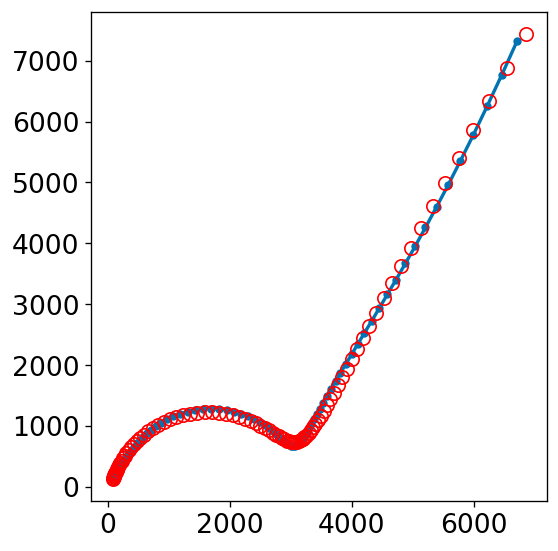

In [24]:
adj_re.mpt_plot(fitting = 'on')

In [26]:
Rs_guess = adj_re.fit_Rs[0]

R_guess = adj_re.fit_R[0]

n_guess = adj_re.fit_n[0]

fs_guess = adj_re.fit_fs[0]


R2_guess = adj_re.fit_R2[0]

n2_guess = adj_re.fit_n2[0]

fs2_guess = adj_re.fit_fs2[0]




#USE THE PARAMETERS DATA STRUCTURE TO WRAP THE INITIAL VALUES
params2 = Parameters()
params2.add('Rs', value=R_guess, min=Rs_guess*.01, max=Rs_guess*100)

params2.add('R', value=R_guess, min=R_guess*.1, max=R_guess*10)
params2.add('n', value=n_guess, min=.65, max=1.2)
params2.add('fs', value=fs_guess, min=10**0.5, max=10**6)
#params2.add('Q', value=fs_guess, min=10**0.5, max=10**6)

params2.add('R2', value=R2_guess, min=R2_guess*.1, max=R2_guess*10)
params2.add('n2', value=n2_guess, min=.65, max=1.2)
params2.add('fs2', value=fs2_guess, min=10**-2, max=10**1)
#params2.add('Q2', value=fs2_guess, min=10**-2, max=10**2)



#FIT THE PARAMETERS ALONG THE R - RQ - RQ CIRCUIT
#LATER WILL PROVIDE OPTIONS TO BENEFITS AND DETRACTIONS OF THE WEIGHT FUNCTION AFTER FURTHER RESEARCH
#print(mpt_data.df[0].keys())
guess = adj_re.mpt_fit(params=params2, circuit='R-RQ-RQ', weight_func='modulus')
#THIS WILL OUTPUT A SET OF COEFFICIENTS PREDICTED FROM THE FIT

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 143
    # data points      = 180
    # variables        = 7
    chi-square         = 187.419109
    reduced chi-square = 1.08334745
    Akaike info crit   = 21.2702874
    Bayesian info crit = 43.6209853
[[Variables]]
    Rs:   40.5527758 +/- 3.22554086 (7.95%) (init = 2955.527)
    R:    2955.52136 +/- 15.2670444 (0.52%) (init = 2955.527)
    n:    0.84660097 +/- 0.00308434 (0.36%) (init = 0.8466007)
    fs:   23059.1439 +/- 205.190543 (0.89%) (init = 23059.07)
    R2:   297024.862 +/- 106139.168 (35.73%) (init = 297010.6)
    n2:   0.71055180 +/- 0.00526436 (0.74%) (init = 0.7105542)
    fs2:  0.21212338 +/- 0.11558418 (54.49%) (init = 0.2121415)
[[Correlations]] (unreported correlations are < 0.100)
    C(R2, fs2) = -1.000
    C(n2, fs2) =  0.925
    C(R2, n2)  = -0.914
    C(R, n2)   =  0.813
    C(R, fs)   = -0.797
    C(R, n)    = -0.749
    C(n, fs)   =  0.681
    C(R, fs2)  =  0.664
    C(R, R2)   = -0

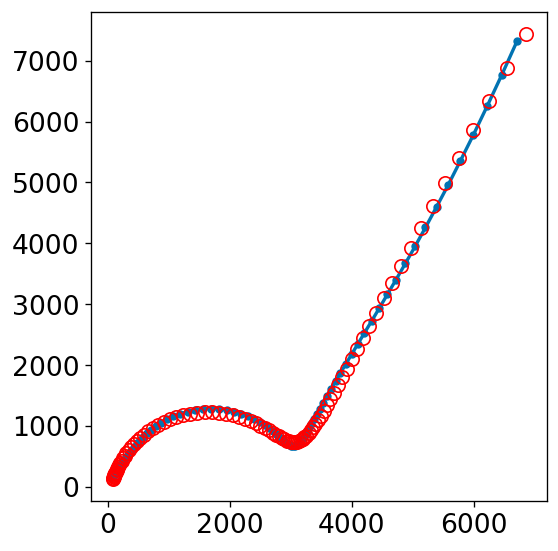

In [27]:
adj_re.mpt_plot(fitting = 'on')

In [28]:
print(adj_re.fit_Rs[0])

print(adj_re.fit_R[0])

print(adj_re.fit_n[0])

print(adj_re.fit_fs[0])

print(adj_re.fit_R2[0])

print(adj_re.fit_n2[0])

print(adj_re.fit_fs2[0])


40.55277575734757
2955.5213567201627
0.8466009693433076
23059.143907702142
297024.86239907815
0.7105518033677353
0.21212337959165653


In [29]:
50.59,2.626e-9,1,54.58,1.457e-6,0.9547,4.793

(50.59, 2.626e-09, 1, 54.58, 1.457e-06, 0.9547, 4.793)

In [30]:
1/(adj_re.fit_R[0] * adj_re.fit_fs[0] * 2 * np.pi)**adj_re.fit_n[0], 1/(adj_re.fit_R2[0] * adj_re.fit_fs2[0] * 2 * np.pi)**adj_re.fit_n2[0]

(4.925277332909297e-08, 0.00010535200084408345)

In [32]:
Rs_guess = adj_re.fit_Rs[0]

R_guess = adj_re.fit_R[0]

n_guess = adj_re.fit_n[0]

fs_guess = adj_re.fit_fs[0]


R2_guess = adj_re.fit_R2[0]

n2_guess = adj_re.fit_n2[0]

fs2_guess = adj_re.fit_fs2[0]




#USE THE PARAMETERS DATA STRUCTURE TO WRAP THE INITIAL VALUES
params3 = Parameters()
params3.add('Rs', value=R_guess, min=Rs_guess*.01, max=Rs_guess*100)

params3.add('R', value=R_guess, min=R_guess*.1, max=R_guess*10)
params3.add('n', value=n_guess, min=.65, max=1.2)
params3.add('fs', value=fs_guess, min=10**0.5, max=10**6)
#params3.add('Q', value=fs_guess, min=10**0.5, max=10**6)

params3.add('R2', value=R2_guess, min=R2_guess*.1, max=R2_guess*10)
params3.add('n2', value=n2_guess, min=.65, max=1.2)
params3.add('fs2', value=fs2_guess, min=10**-2, max=10**1)
#params3.add('Q2', value=fs2_guess, min=10**-2, max=10**2)



#FIT THE PARAMETERS ALONG THE R - RQ - RQ CIRCUIT
#LATER WILL PROVIDE OPTIONS TO BENEFITS AND DETRACTIONS OF THE WEIGHT FUNCTION AFTER FURTHER RESEARCH
#print(mpt_data.df[0].keys())
guess = adj_re.mpt_fit(params=params2, circuit='R-RQ-RQ', weight_func='modulus')
#THIS WILL OUTPUT A SET OF COEFFICIENTS PREDICTED FROM THE FIT

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 143
    # data points      = 180
    # variables        = 7
    chi-square         = 187.419109
    reduced chi-square = 1.08334745
    Akaike info crit   = 21.2702874
    Bayesian info crit = 43.6209853
[[Variables]]
    Rs:   40.5527758 +/- 3.22554086 (7.95%) (init = 2955.527)
    R:    2955.52136 +/- 15.2670444 (0.52%) (init = 2955.527)
    n:    0.84660097 +/- 0.00308434 (0.36%) (init = 0.8466007)
    fs:   23059.1439 +/- 205.190543 (0.89%) (init = 23059.07)
    R2:   297024.862 +/- 106139.168 (35.73%) (init = 297010.6)
    n2:   0.71055180 +/- 0.00526436 (0.74%) (init = 0.7105542)
    fs2:  0.21212338 +/- 0.11558418 (54.49%) (init = 0.2121415)
[[Correlations]] (unreported correlations are < 0.100)
    C(R2, fs2) = -1.000
    C(n2, fs2) =  0.925
    C(R2, n2)  = -0.914
    C(R, n2)   =  0.813
    C(R, fs)   = -0.797
    C(R, n)    = -0.749
    C(n, fs)   =  0.681
    C(R, fs2)  =  0.664
    C(R, R2)   = -0

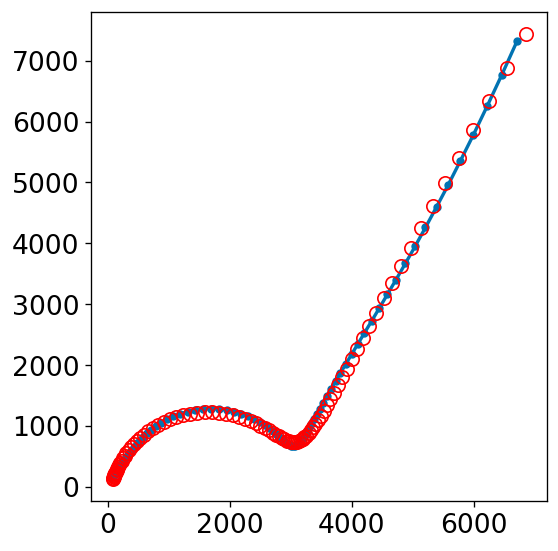

In [34]:
adj_re.mpt_plot(fitting = 'on')

In [35]:
print(adj_re.fit_Rs[0])

print(adj_re.fit_R[0])

print(adj_re.fit_n[0])

print(adj_re.fit_fs[0])

print(adj_re.fit_R2[0])

print(adj_re.fit_n2[0])

print(adj_re.fit_fs2[0])


40.55277575734757
2955.5213567201627
0.8466009693433076
23059.143907702142
297024.86239907815
0.7105518033677353
0.21212337959165653


In [36]:
1/(adj_re.fit_R[0] * adj_re.fit_fs[0] * 2 * np.pi)**adj_re.fit_n[0], 1/(adj_re.fit_R2[0] * adj_re.fit_fs2[0] * 2 * np.pi)**adj_re.fit_n2[0]

(4.925277332909297e-08, 0.00010535200084408345)